<a href="https://colab.research.google.com/github/Syarafina-Dewi/PCA-with-K-Means/blob/main/PCA_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load packages and data

In [ ]:
# General use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D visualization
import plotly as py
import plotly.graph_objs as go

In [ ]:
#connect to google drve
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# read the dataset using pandas
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/SKRIPSI/33_ssn202103_kor_ind_permintaandata22.csv')
df

<ipython-input-3-2c2e2014369f>:2: DtypeWarning: Columns (139,144,153,158,160,176,187,190,201,206,207,208,318,323) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gdrive/My Drive/Colab Notebooks/SKRIPSI/33_ssn202103_kor_ind_permintaandata22.csv')


,D_R,renum,wi1,wi2,r101,r102,r105,r401,r403,r404,...,r1602lain,r1603,r1603lain,r1604,r1605,r1605lain,r1606,r1607,r1608,r1609
0,NaN,6062,5200,281547,33,22,2,1,1,2,...,NaN,0,NaN,0,0,NaN,0,0,0,0
1,NaN,6062,5200,281547,33,22,2,2,2,2,...,NaN,0,NaN,0,0,NaN,0,0,0,0
2,NaN,6062,5200,281547,33,22,2,3,3,1,...,NaN,0,NaN,0,0,NaN,0,0,0,0
3,NaN,6065,5200,111519,33,22,2,1,1,2,...,NaN,0,NaN,0,0,NaN,0,0,0,0
4,NaN,6065,5200,111519,33,22,2,2,2,2,...,NaN,0,NaN,0,2,NaN,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054,NaN,299522,29294,4152,33,22,1,3,3,1,...,NaN,0,NaN,0,0,NaN,0,0,0,0
3055,NaN,299522,29294,4152,33,22,1,4,3,1,...,NaN,0,NaN,0,0,NaN,0,0,0,0
3056,NaN,299522,29294,4152,33,22,1,5,3,2,...,NaN,0,NaN,0,0,NaN,0,0,0,0
3057,NaN,299522,29294,4152,33,22,1,6,5,2,...,NaN,2,NaN,5,0,NaN,5,0,0,0


## Data cleaning

### Pengelopokkan Tingkat Pendidikan

In [ ]:
df1 = df[['r613','r403','r405','r407']]
df1

,r613,r403,r405,r407
0,3,1,1,62
1,4,2,2,61
2,11,3,1,18
3,3,1,1,57
4,8,2,2,51
...,...,...,...,...
3054,11,3,1,22
3055,11,3,2,16
3056,11,3,1,28
3057,11,5,2,27


In [ ]:
df1['r613'] = df1['r613'].replace([2], 1)
df1['r613'] = df1['r613'].replace([3], 1)
df1['r613'] = df1['r613'].replace([4], 1)

df1['r613'] = df1['r613'].replace([5], 1)
df1['r613'] = df1['r613'].replace([6], 1)
df1['r613'] = df1['r613'].replace([7], 1)
df1['r613'] = df1['r613'].replace([8], 1)

df1['r613'] = df1['r613'].replace([9], 2)
df1['r613'] = df1['r613'].replace([10], 2)
df1['r613'] = df1['r613'].replace([11], 2)
df1['r613'] = df1['r613'].replace([12], 2)
df1['r613'] = df1['r613'].replace([13], 2)
df1['r613'] = df1['r613'].replace([14], 2)

df1['r613'] = df1['r613'].replace([15], 3)

df1['r613'] = df1['r613'].replace([16], 3)

df1['r613'] = df1['r613'].replace([17], 3)

df1['r613'] = df1['r613'].replace([18], 3)

df1['r613'] = df1['r613'].replace([19], 3)

df1['r613'] = df1['r613'].replace([20], 3)

df1['r613'] = df1['r613'].replace([21], 3)

<ipython-input-5-9a43bcb34235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r613'] = df1['r613'].replace([2], 1)
<ipython-input-5-9a43bcb34235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r613'] = df1['r613'].replace([3], 1)
<ipython-input-5-9a43bcb34235>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
df1['r403'] = df1['r403'].replace([1], 2)
df1['r403'] = df1['r403'].replace([2], 2)
df1['r403'] = df1['r403'].replace([5], 2)
df1['r403'] = df1['r403'].replace([7], 2)

df1['r403'] = df1['r403'].replace([3], 1)
df1['r403'] = df1['r403'].replace([4], 1)
df1['r403'] = df1['r403'].replace([5], 1)
df1['r403'] = df1['r403'].replace([6], 1)

<ipython-input-6-27c478267e98>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r403'] = df1['r403'].replace([1], 2)
<ipython-input-6-27c478267e98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r403'] = df1['r403'].replace([2], 2)
<ipython-input-6-27c478267e98>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [ ]:
df1['r403'].value_counts()

2    1769
1    1234
9      55
8       1
Name: r403, dtype: int64

In [ ]:
Baru = df1[['r405','r407']][(df1['r403']==9)]

In [ ]:
Baru['r407'].value_counts()

17    3
47    3
9     2
42    2
34    2
16    2
4     2
75    2
36    2
33    2
40    2
23    2
21    1
39    1
74    1
30    1
31    1
91    1
80    1
41    1
87    1
88    1
45    1
89    1
58    1
15    1
0     1
77    1
72    1
50    1
14    1
19    1
28    1
63    1
1     1
82    1
32    1
5     1
71    1
67    1
65    1
Name: r407, dtype: int64

In [ ]:
df1['r403'] = np.where(
   (df1['r407'] >=20) & (df1['r403'] == 9) , 2, df1['r403']
   )

<ipython-input-10-9a55edfd6c3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r403'] = np.where(


In [ ]:
df1['r403'].value_counts()

2    1809
1    1234
9      15
8       1
Name: r403, dtype: int64

In [ ]:
df1['r403'] = np.where(
   (df1['r407'] <=20) & (df1['r403'] == 9) , 1, df1['r403']
   )

<ipython-input-12-95c9228c68f7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r403'] = np.where(


In [ ]:
df1['r403'].value_counts()

2    1809
1    1249
8       1
Name: r403, dtype: int64

In [ ]:
df1['r403'] = df1['r403'].replace([8], 0)

<ipython-input-14-1660f0206f6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['r403'] = df1['r403'].replace([8], 0)


In [ ]:
df1['r403'].value_counts()

2    1809
1    1249
0       1
Name: r403, dtype: int64

In [ ]:
df1

,r613,r403,r405,r407
0,1,2,1,62
1,1,2,2,61
2,2,1,1,18
3,1,2,1,57
4,1,2,2,51
...,...,...,...,...
3054,2,1,1,22
3055,2,1,2,16
3056,2,1,1,28
3057,2,2,2,27


In [ ]:
#df1.columns = ["Gender", "Umur","Pendidikan Tertinggi"]
#df1

### Standardization

In [ ]:
# For standardizing features. we will use the StandardScaler module
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df1)

In [ ]:
segmentation_std

array([[-0.31504913,  0.83069744, -1.00820628,  1.2925049 ],
       [-0.31504913,  0.83069744,  0.99186052,  1.24570915],
       [ 1.01424093, -1.20056032, -1.00820628, -0.76650788],
       ...,
       [ 1.01424093, -1.20056032, -1.00820628, -0.29855043],
       [ 1.01424093,  0.83069744,  0.99186052, -0.34534617],
       [-1.64433919, -1.20056032,  0.99186052, -1.60883128]])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(segmentation_std)

PCA()

In [ ]:
pca.explained_variance_ratio_

array([0.45977302, 0.24939281, 0.23691373, 0.05392044])

Text(0.5, 1.0, 'Explained Variance by Components')

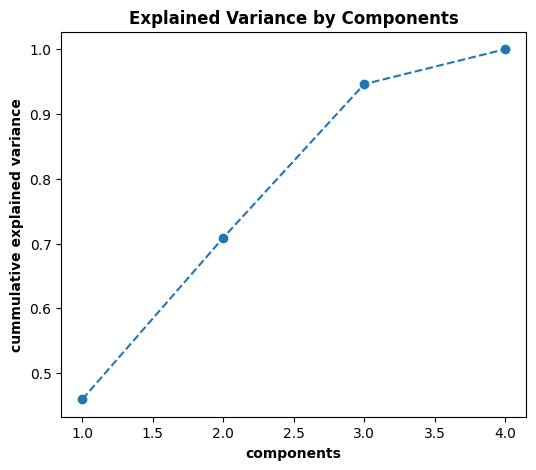

In [ ]:
plt.figure(figsize = (6,5))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.xlabel('components', fontweight='bold')
plt.ylabel('cummulative explained variance', fontweight='bold')
plt.title('Explained Variance by Components', fontweight='bold')

In [ ]:
print ("Proportion of Variance Explained : ", pca.explained_variance_ratio_)

out_sum = np.cumsum(pca.explained_variance_ratio_)
print ("Cumulative Prop. Variance Explained: ", out_sum)

Proportion of Variance Explained :  [0.45977302 0.24939281 0.23691373 0.05392044]
Cumulative Prop. Variance Explained:  [0.45977302 0.70916583 0.94607956 1.        ]


we need to decide how many features we’d like to keep based on the cumulative variance plot

by choose the number of params near 80%

In [ ]:
print(pca.explained_variance_)

[1.83969347 0.99789747 0.94796482 0.21575229]


In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4'], index=df1.columns)
loadings

,PC1,PC2,PC3,PC4
r613,0.240294,0.136134,0.961069,0.008481
r403,0.686164,-0.000571,-0.165227,-0.708434
r405,0.075446,-0.988752,0.120788,0.045700
r407,0.682456,0.061948,-0.185622,0.704245


In [ ]:
# We perform PCA with the chosen number of components
# We choose two components, 2 or 3 seems the right choice according to the previous graph
pca = PCA(n_components = 2)

In [ ]:
# Fit the model to our data with selected number of components. In our case is three.
pca.fit(segmentation_std)

PCA(n_components=2)

We need only the calculated resulting components scores for the elements in our data set

In [ ]:
pca.transform(segmentation_std)

array([[ 1.30030307,  1.03357011],
       [ 1.41926308, -0.94689804],
       [-1.17923741,  1.08814027],
       ...,
       [-0.85987705,  1.11712921],
       [ 0.65285828, -0.86449912],
       [-2.24203085, -1.30353163]])

In [ ]:
scores_pca = pca.transform(segmentation_std)

### K-Means clustering with PCA

We’ll incorporate the newly obtained PCA scores in the K-means algorithm. That's how we can perform segmentation based on principal components scores instead of the original features.

First, however, we must decide how many clustering solutions we’d test.

In [ ]:
# Fit K-Means using the transformed data drom PCA
wcss = []
for i in range(1,10):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

The next step involves plotting the WCSS against the number of components on a graph.

Text(0.5, 1.0, 'Elbow Method for selection of optimal K clusters')

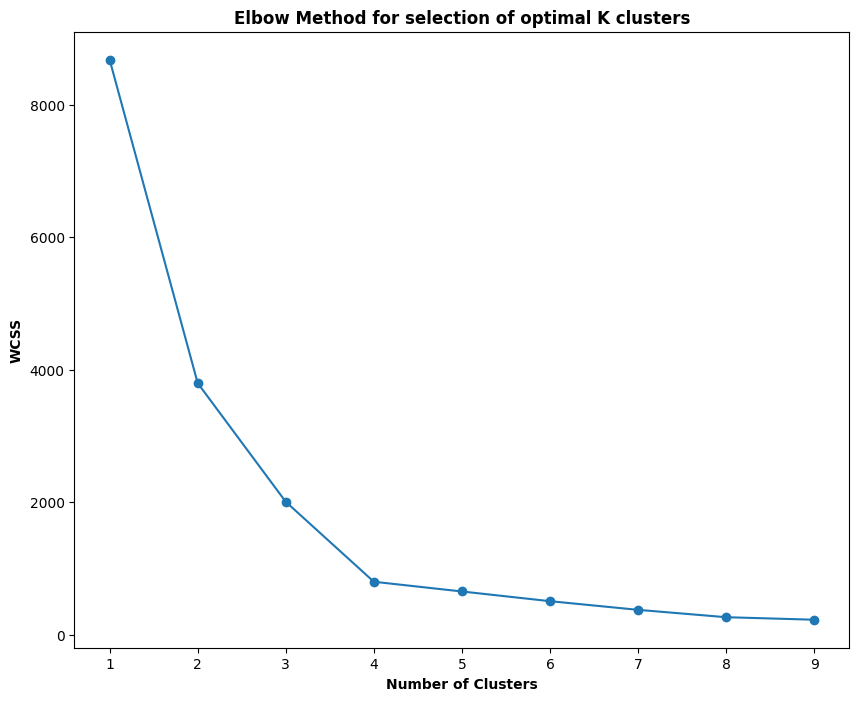

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 10), wcss, marker = 'o')
plt.xlabel('Number of Clusters', fontweight='bold')
plt.ylabel('WCSS', fontweight='bold')
plt.title('Elbow Method for selection of optimal K clusters', fontweight='bold')

And from this graph, we determine the number of clusters we’d like to keep. To that effect, we use the Elbow-method. The approach consists of looking for a kink or elbow in the WCSS graph. Usually, the part of the graph before the elbow would be steeply declining, while the part after it – much smoother. In this instance, the kink comes at the 4 clusters mark. So, we’ll be keeping a four-cluster solution.

In [ ]:
# We have chosen for clusters, so we run K-Means with the number of clusters equals three.
# Same initializer and random state as before
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [ ]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

Evaluation with Silhouette Score

In [ ]:
labels = kmeans_pca.labels_
labels

array([2, 0, 1, ..., 1, 0, 3], dtype=int32)

In [ ]:
centroids  = kmeans_pca.cluster_centers_
centroids

array([[ 1.08444644, -0.92689143],
       [-1.57697179,  0.91363876],
       [ 1.00297294,  1.05870647],
       [-1.46355269, -1.06529566]])

In [ ]:
silhouette_score(scores_pca, labels)

0.7074465194305294

In [ ]:
silhouette = {}

for k in range(2, 10):
  km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
  km.fit(scores_pca)
  silhouette[k] = silhouette_score(scores_pca, km.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

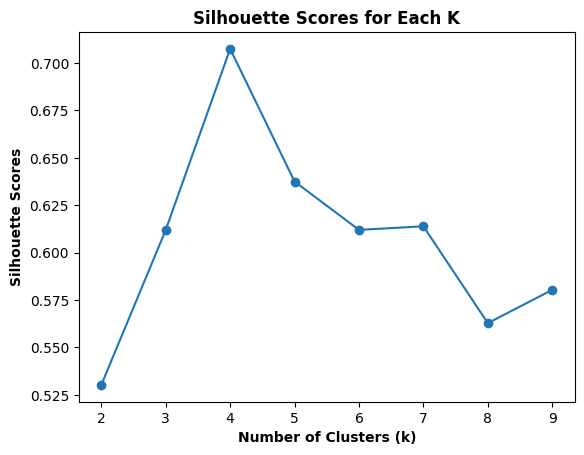

In [ ]:
plt.plot(list(silhouette.keys()), list(silhouette.values()), marker = 'o')
plt.xlabel("Number of Clusters (k)", fontweight='bold')
plt.ylabel("Silhouette Scores", fontweight='bold')
plt.title("Silhouette Scores for Each K", fontweight='bold')
plt.show()

### Davies Bouldin Index

In [ ]:
from sklearn.metrics import davies_bouldin_score
db_index = davies_bouldin_score(scores_pca, km.labels_)
db_index

0.5485459818973579

In [ ]:
results = {}

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(scores_pca)
    db_index = davies_bouldin_score(scores_pca, labels)
    results.update({i: db_index})

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

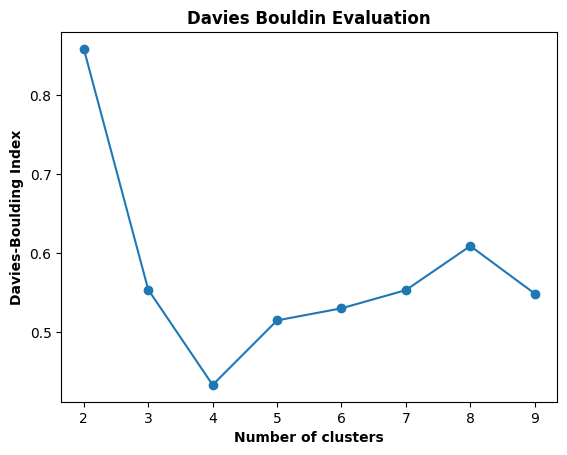

In [ ]:
plt.plot(list(results.keys()), list(results.values()), marker = 'o')
plt.xlabel("Number of clusters", fontweight='bold')
plt.ylabel("Davies-Boulding Index", fontweight='bold')
plt.title("Davies Bouldin Evaluation", fontweight='bold')
plt.show()

Analyze the Results of PCA and K-Means Clustering

In [ ]:
# We create new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df1.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-2: ] = ['Component 1', 'Component 2']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment k-Means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans.head()

,r613,r403,r405,r407,Component 1,Component 2,Segment k-Means PCA
0,1,2,1,62,1.300303,1.033570,2
1,1,2,2,61,1.419263,-0.946898,0
2,2,1,1,18,-1.179237,1.088140,1
3,1,2,1,57,1.140623,1.019076,2
4,1,2,2,51,1.099903,-0.975887,0


In [ ]:
#transfer DataFrame to CSV file
#df_segm_pca_kmeans.to_csv('df_segm_pca_kmeans.txt')
#!cp data.txt "gdrive/My Drive/Colab Notebooks/Data/"

cp: cannot stat 'data.txt': No such file or directory


In [ ]:
#download file
#from google.colab import files
#files.download("df_segm_pca_kmeans.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_segm_pca_kmeans['Segment k-Means PCA'].value_counts()

0    969
2    845
1    672
3    573
Name: Segment k-Means PCA, dtype: int64

we should add the names of the segments to the labels
We create a new column named ‘Segment’ and map the four clusters directly inside it

In [ ]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment k-Means PCA'].map({0:'1',1:'2',2:'3',3:'4'})

Let’s finish off by visualizing our clusters on a 2D plane. It's a 2D visualization, so we need to choose two components and use them as axes. The point of PCA was to determine the most important components. This way, we can be absolutely sure that the first two components explain more variance than the third one.

<function matplotlib.pyplot.show(close=None, block=None)>

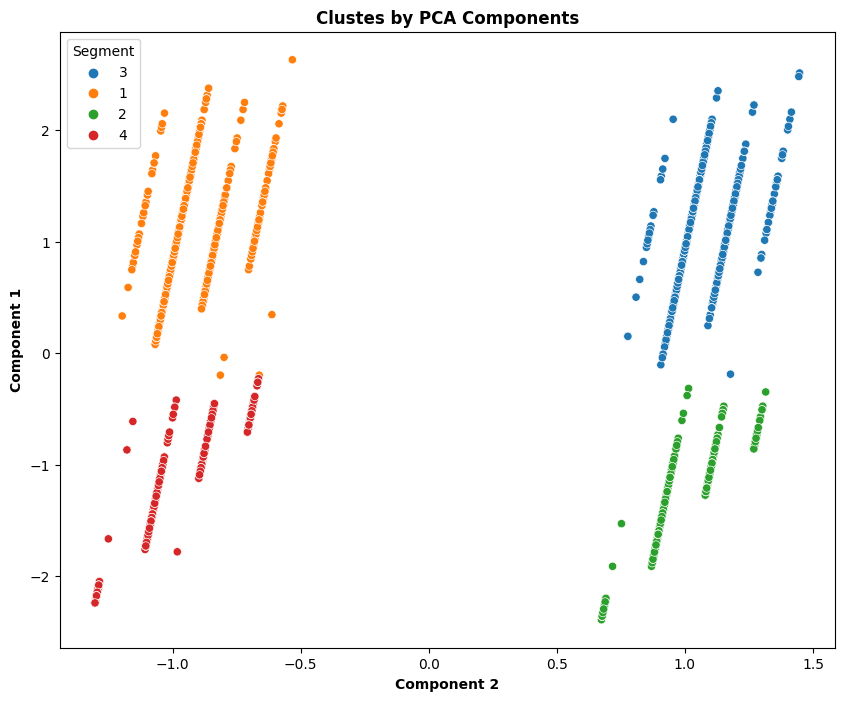

In [ ]:
# Plot the data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'])
plt.xlabel("Component 2", fontweight='bold')
plt.ylabel("Component 1", fontweight='bold')
plt.title('Clustes by PCA Components', fontweight='bold')
plt.show

In [ ]:
df_segm_pca_kmeans['pendidikan'] = df['r613'].copy()

## Replace untuk Visualisasi

In [ ]:
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([2], 'SD /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([3], 'SD /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([4], 'SD /  Sederajat')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([5], 'SMP /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([6], 'SMP /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([7], 'SMP /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([8], 'SMP /  Sederajat')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([9], 'SMA /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([10], 'SMA /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([11], 'SMA /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([12], 'SMA /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([13], 'SMA /  Sederajat')
df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([14], 'SMA /  Sederajat')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([15], 'D1 / D2')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([16], 'D3')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([17], 'D4')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([18], 'S1')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([19], 'Profesi')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([20], 'S2')

df_segm_pca_kmeans['pendidikan'] = df_segm_pca_kmeans['pendidikan'].replace([21], 'S3')

In [ ]:
df_segm_pca_kmeans['r403'] = df_segm_pca_kmeans['r403'].replace([2], 'Orang Tua')
df_segm_pca_kmeans['r403'] = df_segm_pca_kmeans['r403'].replace([1], 'Anak')
df_segm_pca_kmeans['r403'] = df_segm_pca_kmeans['r403'].replace([0], 'Dll')

In [ ]:
df_segm_pca_kmeans['r405'] = df_segm_pca_kmeans['r405'].replace([1], 'Laki-laki')
df_segm_pca_kmeans['r405'] = df_segm_pca_kmeans['r405'].replace([2], 'Perempuan')

In [ ]:
df_segm_pca_kmeans['r613'] = df_segm_pca_kmeans['r613'].replace([0], 'Tidak / Belum Sekolah')
df_segm_pca_kmeans['r613'] = df_segm_pca_kmeans['r613'].replace([1], 'Pendidikan Dasar')
df_segm_pca_kmeans['r613'] = df_segm_pca_kmeans['r613'].replace([2], 'Pendidikan Menengah')
df_segm_pca_kmeans['r613'] = df_segm_pca_kmeans['r613'].replace([3], 'Pendidikan Tinggi')

In [ ]:
df_segm_pca_kmeans['Segment k-Means PCA'] = df_segm_pca_kmeans['Segment k-Means PCA'].replace([0], '1')
df_segm_pca_kmeans['Segment k-Means PCA'] = df_segm_pca_kmeans['Segment k-Means PCA'].replace([1], '2')
df_segm_pca_kmeans['Segment k-Means PCA'] = df_segm_pca_kmeans['Segment k-Means PCA'].replace([2], '3')
df_segm_pca_kmeans['Segment k-Means PCA'] = df_segm_pca_kmeans['Segment k-Means PCA'].replace([3], '4')

In [ ]:
df_segm_pca_kmeans.rename(
    columns={"r403": "Status dalam Keluarga", "r405": "Jenis Kelamin", "r407": "Umur", "r613": "Tingkat Pendidikan", "Segment k-Means PCA": "Cluster"},
    inplace=True,
)

df_segm_pca_kmeans

,Tingkat Pendidikan,Status dalam Keluarga,Jenis Kelamin,Umur,Component 1,Component 2,Cluster,Segment,pendidikan
0,Pendidikan Dasar,Orang Tua,Laki-laki,62,1.300303,1.033570,3,3,SD / Sederajat
1,Pendidikan Dasar,Orang Tua,Perempuan,61,1.419263,-0.946898,1,1,SD / Sederajat
2,Pendidikan Menengah,Anak,Laki-laki,18,-1.179237,1.088140,2,2,SMA / Sederajat
3,Pendidikan Dasar,Orang Tua,Laki-laki,57,1.140623,1.019076,3,3,SD / Sederajat
4,Pendidikan Dasar,Orang Tua,Perempuan,51,1.099903,-0.975887,1,1,SMP / Sederajat
...,...,...,...,...,...,...,...,...,...
3054,Pendidikan Menengah,Anak,Laki-laki,22,-1.051493,1.099736,2,2,SMA / Sederajat
3055,Pendidikan Menengah,Anak,Perempuan,16,-1.092213,-0.895227,4,4,SMA / Sederajat
3056,Pendidikan Menengah,Anak,Laki-laki,28,-0.859877,1.117129,2,2,SMA / Sederajat
3057,Pendidikan Menengah,Orang Tua,Perempuan,27,0.652858,-0.864499,1,1,SMA / Sederajat


## Visualisasi Hasil Analisis

Text(0.5, 1.0, 'Type Clusters over the Status in Family')

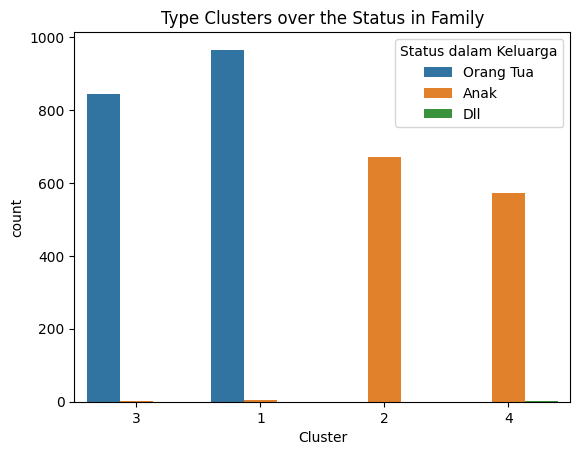

In [ ]:
sns.countplot(x='Cluster',hue='Status dalam Keluarga',data=df_segm_pca_kmeans)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type Clusters over the Status in Family")

Text(0.5, 1.0, 'Type Clusters over the Status in Family')

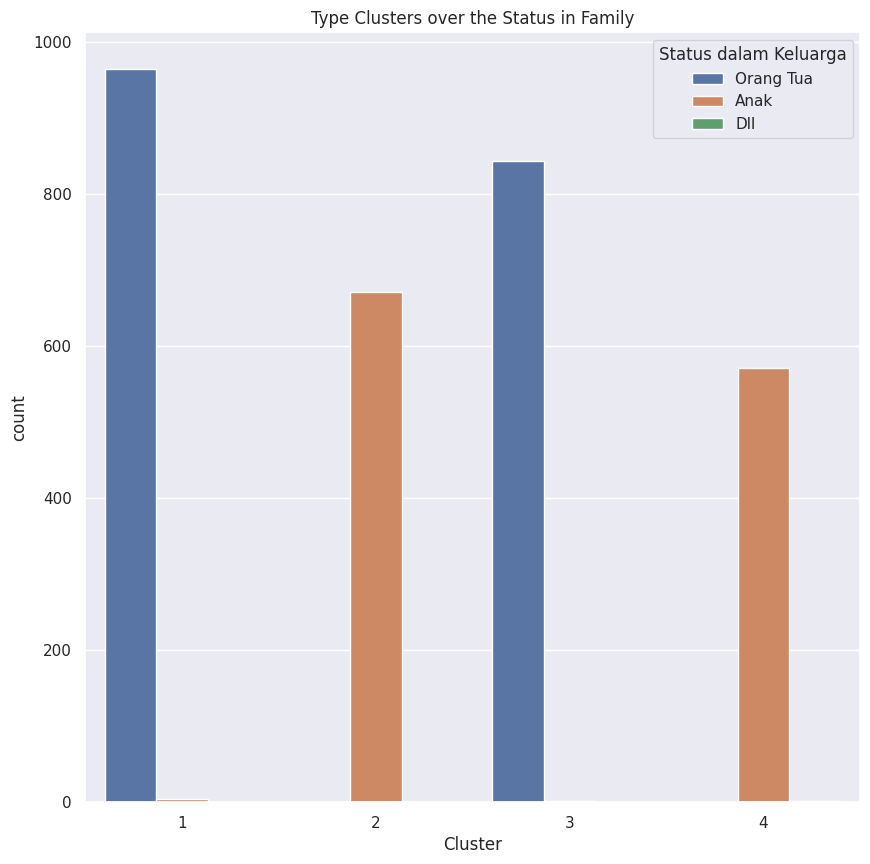

In [ ]:
sns.countplot(x='Cluster',hue='Status dalam Keluarga',order=['1','2','3','4'] , data=df_segm_pca_kmeans)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type Clusters over the Status in Family")

Text(0.5, 1.0, 'Type Clusters over the Gender')

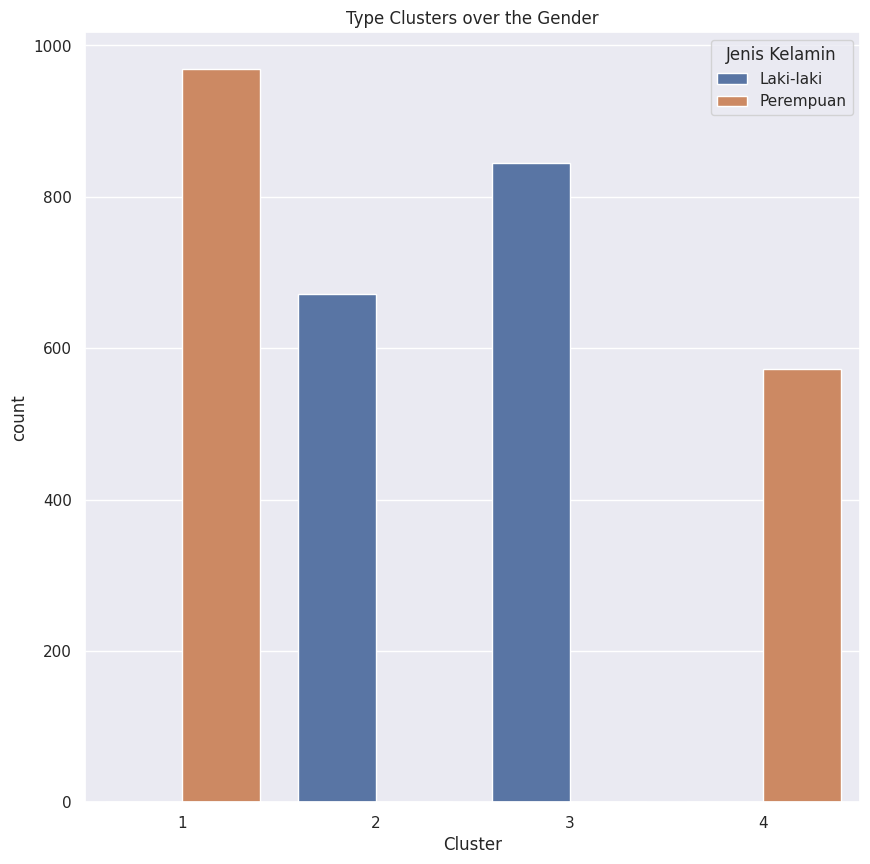

In [ ]:
sns.countplot(x='Cluster',hue='Jenis Kelamin',order=['1','2','3','4'], data=df_segm_pca_kmeans)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type Clusters over the Gender")

Text(0.5, 1.0, 'Type Clusters over the Age')

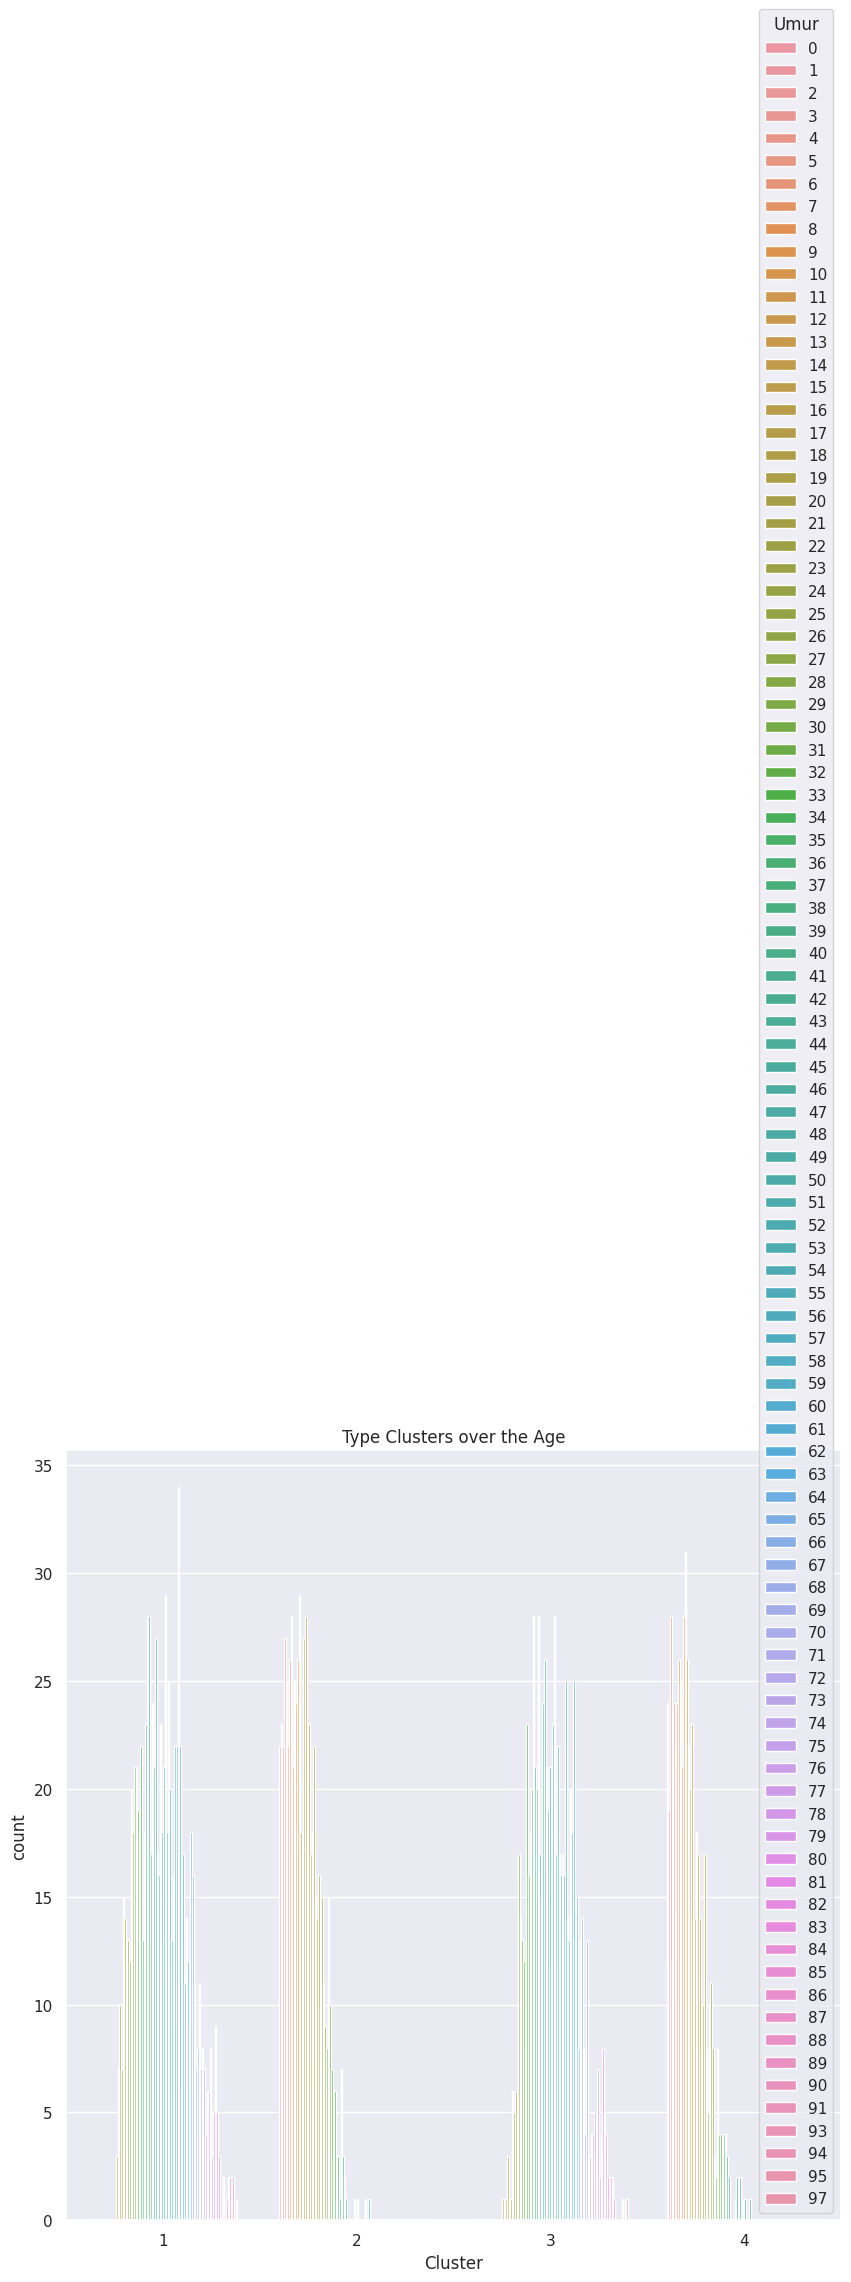

In [ ]:
sns.countplot(x='Cluster',hue='Umur',order=['1','2','3','4'],data=df_segm_pca_kmeans)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type Clusters over the Age")

Text(0.5, 1.0, 'Type Clusters over the Education Level')

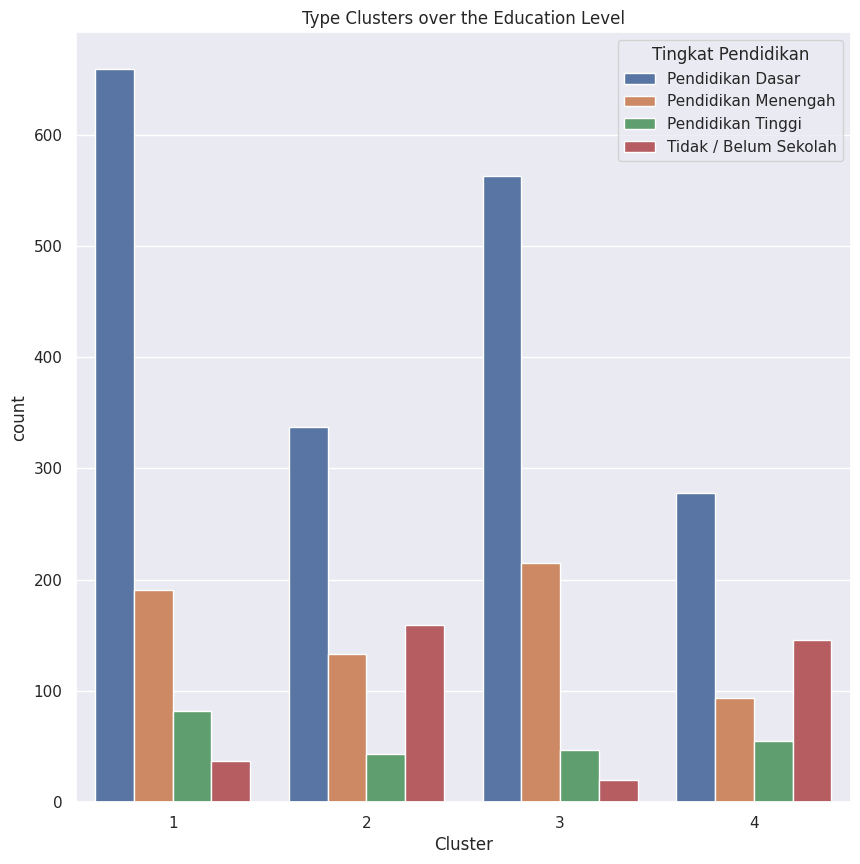

In [ ]:
sns.countplot(x='Cluster',hue='Tingkat Pendidikan',order=['1','2','3','4'],data=df_segm_pca_kmeans)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type Clusters over the Education Level")

Text(0.5, 1.0, 'Type Clusters over the Latest Education')

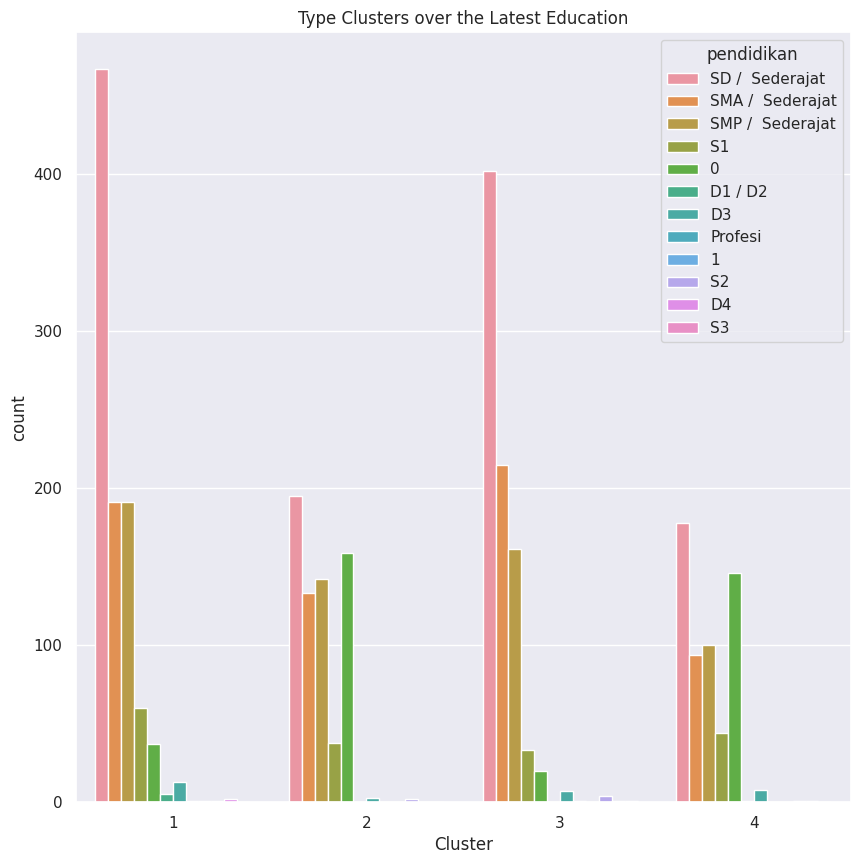

In [ ]:
sns.countplot(x='Cluster',hue='pendidikan',order=['1','2','3','4'],data=df_segm_pca_kmeans)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("Type Clusters over the Latest Education")

Text(0, 0.5, 'Umur')

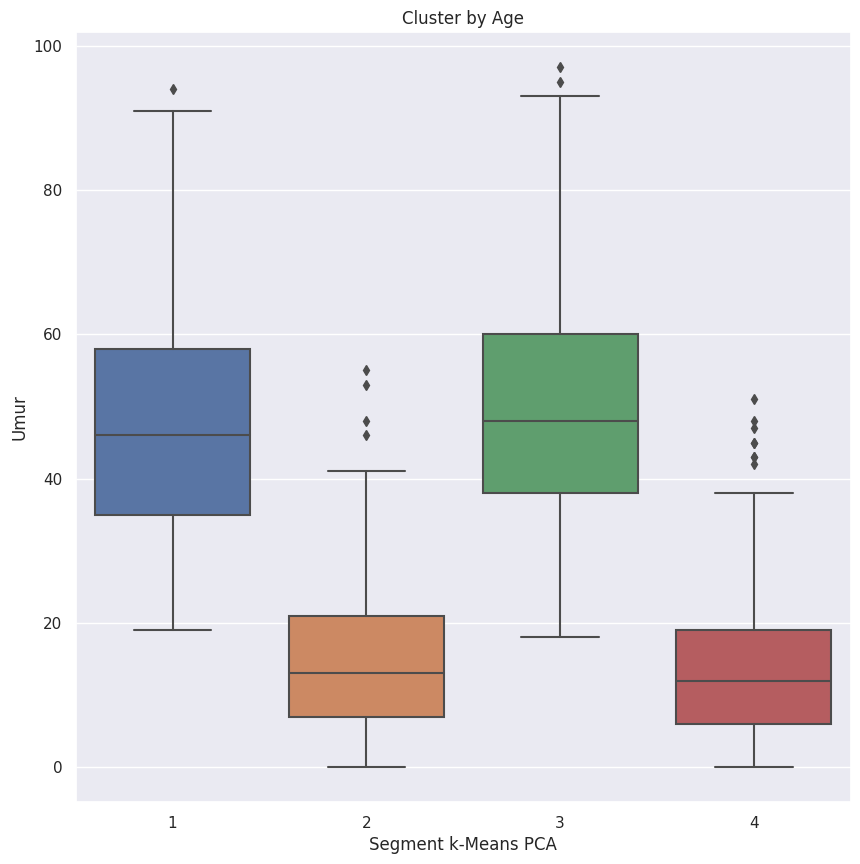

In [ ]:
#create seaborn boxplots by group
sns.boxplot(x='Cluster', y='Umur',order=['1','2','3','4'] , data=df_segm_pca_kmeans).set(title='Cluster by Age')

#modify axis labels
plt.xlabel('Segment k-Means PCA')
plt.ylabel('Umur')

Text(0.5, 1.0, 'The number of each cluster')

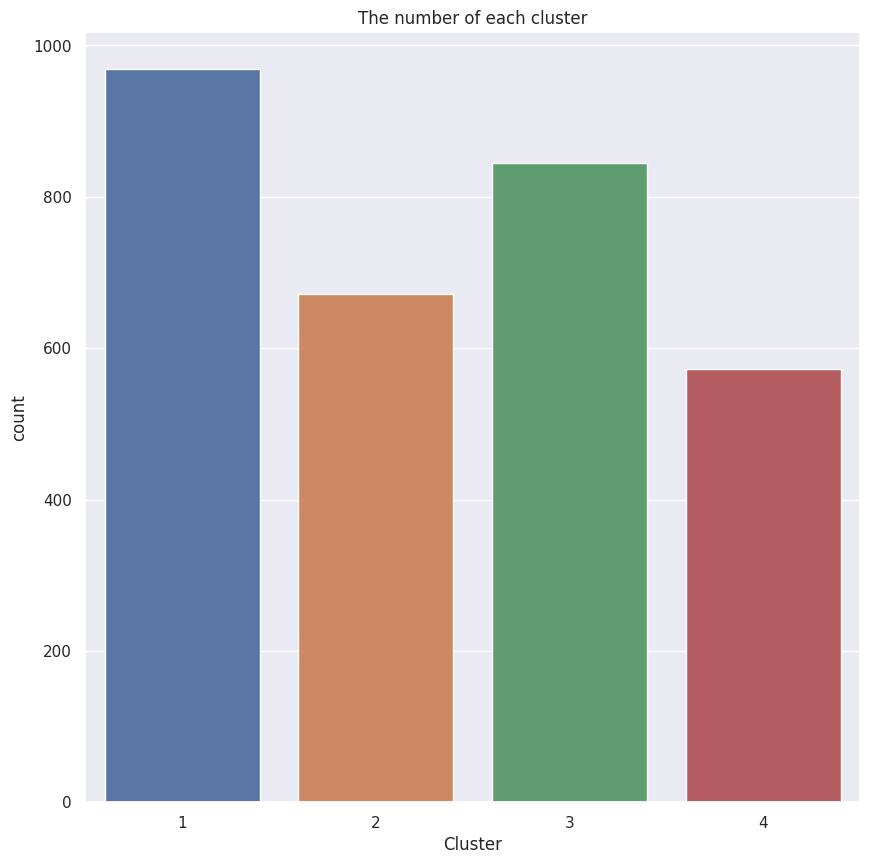

In [ ]:
sns.countplot(x='Cluster', order=['1','2','3','4'], data=df_segm_pca_kmeans)
sns.set(rc={'figure.figsize':(10,10)})
plt.title("The number of each cluster")

### Cluster 1 2 3 4

### Cluster 1

In [ ]:
Cluster1 = df_segm_pca_kmeans[["Status dalam Keluarga","Jenis Kelamin","Umur","Tingkat Pendidikan","Cluster"]][(df_segm_pca_kmeans['Cluster']=="1")]
Cluster1

,Status dalam Keluarga,Jenis Kelamin,Umur,Tingkat Pendidikan,Cluster
1,Orang Tua,Perempuan,61,Pendidikan Dasar,1
4,Orang Tua,Perempuan,51,Pendidikan Dasar,1
6,Orang Tua,Perempuan,26,Pendidikan Menengah,1
8,Orang Tua,Perempuan,46,Pendidikan Menengah,1
11,Orang Tua,Perempuan,47,Pendidikan Menengah,1
...,...,...,...,...,...
3043,Orang Tua,Perempuan,31,Pendidikan Menengah,1
3046,Orang Tua,Perempuan,70,Pendidikan Dasar,1
3048,Orang Tua,Perempuan,31,Pendidikan Dasar,1
3053,Orang Tua,Perempuan,57,Pendidikan Dasar,1


In [ ]:
Cluster1["Tingkat Pendidikan"].value_counts()

Pendidikan Dasar         659
Pendidikan Menengah      191
Pendidikan Tinggi         82
Tidak / Belum Sekolah     37
Name: Tingkat Pendidikan, dtype: int64

In [ ]:
Cluster1["Status dalam Keluarga"].value_counts()

Orang Tua    965
Anak           4
Name: Status dalam Keluarga, dtype: int64

In [ ]:
Cluster1["Jenis Kelamin"].value_counts()

Perempuan    969
Name: Jenis Kelamin, dtype: int64

### Cluster 2

In [ ]:
Cluster2 = df_segm_pca_kmeans[["Status dalam Keluarga","Jenis Kelamin","Umur","Tingkat Pendidikan","Cluster"]][(df_segm_pca_kmeans['Cluster']=="2")]
Cluster2

,Status dalam Keluarga,Jenis Kelamin,Umur,Tingkat Pendidikan,Cluster
2,Anak,Laki-laki,18,Pendidikan Menengah,2
5,Anak,Laki-laki,30,Pendidikan Tinggi,2
12,Anak,Laki-laki,14,Pendidikan Dasar,2
13,Anak,Laki-laki,12,Pendidikan Dasar,2
16,Anak,Laki-laki,26,Pendidikan Dasar,2
...,...,...,...,...,...
3029,Anak,Laki-laki,26,Pendidikan Dasar,2
3035,Anak,Laki-laki,2,Tidak / Belum Sekolah,2
3045,Anak,Laki-laki,3,Tidak / Belum Sekolah,2
3054,Anak,Laki-laki,22,Pendidikan Menengah,2


In [ ]:
Cluster2["Tingkat Pendidikan"].value_counts()

Pendidikan Dasar         337
Tidak / Belum Sekolah    159
Pendidikan Menengah      133
Pendidikan Tinggi         43
Name: Tingkat Pendidikan, dtype: int64

In [ ]:
Cluster2["Status dalam Keluarga"].value_counts()

Anak    672
Name: Status dalam Keluarga, dtype: int64

In [ ]:
Cluster2["Jenis Kelamin"].value_counts()

Laki-laki    672
Name: Jenis Kelamin, dtype: int64

### Cluster 3

In [ ]:
Cluster3 = df_segm_pca_kmeans[["Status dalam Keluarga","Jenis Kelamin","Umur","Tingkat Pendidikan","Cluster"]][(df_segm_pca_kmeans['Cluster']=="3")]
Cluster3

,Status dalam Keluarga,Jenis Kelamin,Umur,Tingkat Pendidikan,Cluster
0,Orang Tua,Laki-laki,62,Pendidikan Dasar,3
3,Orang Tua,Laki-laki,57,Pendidikan Dasar,3
7,Orang Tua,Laki-laki,51,Pendidikan Dasar,3
10,Orang Tua,Laki-laki,51,Pendidikan Dasar,3
14,Orang Tua,Laki-laki,64,Pendidikan Dasar,3
...,...,...,...,...,...
3038,Orang Tua,Laki-laki,36,Pendidikan Menengah,3
3042,Orang Tua,Laki-laki,34,Pendidikan Menengah,3
3047,Orang Tua,Laki-laki,35,Pendidikan Menengah,3
3051,Orang Tua,Laki-laki,42,Pendidikan Dasar,3


In [ ]:
Cluster3["Tingkat Pendidikan"].value_counts()

Pendidikan Dasar         563
Pendidikan Menengah      215
Pendidikan Tinggi         47
Tidak / Belum Sekolah     20
Name: Tingkat Pendidikan, dtype: int64

In [ ]:
Cluster3["Status dalam Keluarga"].value_counts()

Orang Tua    844
Anak           1
Name: Status dalam Keluarga, dtype: int64

In [ ]:
Cluster3["Jenis Kelamin"].value_counts()

Laki-laki    845
Name: Jenis Kelamin, dtype: int64

### Cluster 4

In [ ]:
Cluster4 = df_segm_pca_kmeans[["Status dalam Keluarga","Jenis Kelamin","Tingkat Pendidikan","Umur","Cluster"]][(df_segm_pca_kmeans['Cluster']=="4")]
Cluster4

,Status dalam Keluarga,Jenis Kelamin,Tingkat Pendidikan,Umur,Cluster
9,Anak,Perempuan,Pendidikan Tinggi,19,4
24,Anak,Perempuan,Pendidikan Menengah,20,4
27,Anak,Perempuan,Pendidikan Dasar,29,4
35,Anak,Perempuan,Pendidikan Dasar,7,4
38,Anak,Perempuan,Tidak / Belum Sekolah,1,4
...,...,...,...,...,...
3044,Anak,Perempuan,Pendidikan Dasar,11,4
3049,Anak,Perempuan,Pendidikan Dasar,6,4
3050,Anak,Perempuan,Tidak / Belum Sekolah,2,4
3055,Anak,Perempuan,Pendidikan Menengah,16,4


In [ ]:
Cluster4["Tingkat Pendidikan"].value_counts()

Pendidikan Dasar         278
Tidak / Belum Sekolah    146
Pendidikan Menengah       94
Pendidikan Tinggi         55
Name: Tingkat Pendidikan, dtype: int64

In [ ]:
Cluster4["Status dalam Keluarga"].value_counts()

Anak    572
Dll       1
Name: Status dalam Keluarga, dtype: int64

In [ ]:
Cluster4["Jenis Kelamin"].value_counts()

Perempuan    573
Name: Jenis Kelamin, dtype: int64